# Dataset consumo de energía

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [22]:
data = pd.read_csv('dataset_huella_carbono.csv')

In [23]:
data.head()

,cd_grupo,cd_cliente,nivel_grupo,fh_alta,fh_nacimiento,tp_sector,cd_actividad,cd_postal,cd_estado,nm_sector,recursos,credito,rentabilidad,consumo_cfe_12m,pagos_cfe_12m
0,fcfab33979ee05bd9e35dc34261ae4b2257993e9b1d5cb...,349628717aece69de5d1fde443724d38a69b6641c8a5b0...,medio,1996-05-11,1983-06-13,M31,6.215017e+10,6080.0,DF,Retail,4.164889e+06,44286666.73,669238.166090,36301.0,7.0
1,fcfab33979ee05bd9e35dc34261ae4b2257993e9b1d5cb...,21a36566dfa6974ab7dda301fa1a38227b65dbbf5b6e0d...,medio,1996-05-11,1988-02-24,M31,8.415011e+10,6010.0,DF,Capital goods & Industrial services,3.425179e+05,0.00,21994.617701,0.0,0.0
2,bf96458fe7f1c5fc09e63c0e67e959ff5b747ff68122f2...,01c064120a66e57e2020d3d1eb6e1a7399f473ef9284b2...,bajo,1996-05-11,1987-04-25,M31,8.611015e+10,6500.0,DF,Leisure & Consumer Services,5.335033e+06,0.00,162952.529700,599421.0,12.0
3,71db9d6a633b7e05dc38a13eca34a98c9a00709cefa857...,73f9fe83634c367521a4e9a87569b5743c1266954df060...,medio,1996-05-11,1991-10-25,M31,8.421018e+10,2169.0,DF,"Telecoms, Technology & Media",1.303536e+06,0.00,493516.451370,0.0,0.0
4,5ed81cf8e173a267f0c4ae5ed22ae1e9ea90c4e2ac68f9...,0e497271afded8540489077d2b8e0db256e49c14966798...,bajo,1996-05-11,1984-12-14,M31,6.225032e+10,11560.0,DF,Retail,1.028458e+06,0.00,52559.533089,0.0,0.0


In [24]:
data.shape

(59588, 15)

In [112]:
len(data['cd_grupo'].unique())

12854

In [25]:
data.columns.values

array(['cd_grupo', 'cd_cliente', 'nivel_grupo', 'fh_alta',
       'fh_nacimiento', 'tp_sector', 'cd_actividad', 'cd_postal',
       'cd_estado', 'nm_sector', 'recursos', 'credito', 'rentabilidad',
       'consumo_cfe_12m', 'pagos_cfe_12m'], dtype=object)

In [26]:
data_rec = data['recursos']
data_rec.head()

0    4.164889e+06
1    3.425179e+05
2    5.335033e+06
3    1.303536e+06
4    1.028458e+06
Name: recursos, dtype: float64

In [27]:
data_y = data['consumo_cfe_12m']
data_y.head()

0     36301.0
1         0.0
2    599421.0
3         0.0
4         0.0
Name: consumo_cfe_12m, dtype: float64

(array([23481.,     0.,     0., 15058.,     0.,     0., 13325.,     0.,
            0.,  7724.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

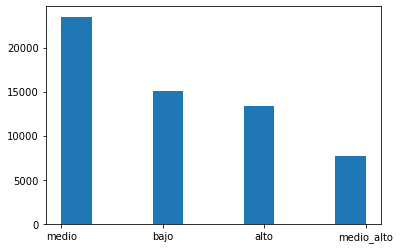

In [28]:
plt.hist(data['nivel_grupo'])

# Matriz de correlaciones

In [29]:
import seaborn as sns

In [30]:
df_importantes = data.iloc[:,10:]

In [31]:
df_importantes.columns.values

array(['recursos', 'credito', 'rentabilidad', 'consumo_cfe_12m',
       'pagos_cfe_12m'], dtype=object)

In [32]:
df_importantes.shape

(59588, 5)

In [33]:
correlation_mat = df_importantes.corr()

<AxesSubplot:>

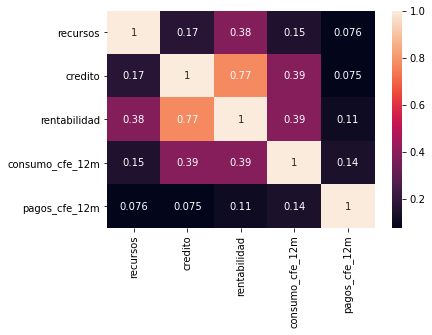

In [34]:
sns.heatmap(correlation_mat, annot = True)

# Algunos datos interesantes sobre consumo_cfe_12m

In [35]:
data_y.head()
data_pagos = data.iloc[:,13:]

In [36]:
data_pagos

,consumo_cfe_12m,pagos_cfe_12m
0,36301.00,7.0
1,0.00,0.0
2,599421.00,12.0
3,0.00,0.0
4,0.00,0.0
...,...,...
59583,0.00,0.0
59584,0.00,0.0
59585,0.00,0.0
59586,108548.14,1.0


Promedio de consumo de energía

In [37]:
data_pagos['consumo_cfe_12m'].mean()

530306.1278953819

In [38]:
data_y_sin0 = data_pagos['consumo_cfe_12m'] > 0

In [39]:
data_y_sin0 = data_pagos[data_y_sin0]

In [40]:
data_y_sin0.shape

(13907, 2)

In [41]:
data_y_sin0

,consumo_cfe_12m,pagos_cfe_12m
0,36301.00,7.0
2,599421.00,12.0
7,45828296.38,13.0
8,40689.00,7.0
9,11379.00,1.0
...,...,...
59063,5994.00,1.0
59133,269817.00,1.0
59210,144840.00,18.0
59403,3056.00,1.0


### Promedio de los que si han pagado durante el año

In [42]:
data_y_sin0.mean()

consumo_cfe_12m    2.272228e+06
pagos_cfe_12m      2.768548e+01
dtype: float64

In [43]:
data_y_sin0.min()

consumo_cfe_12m    35.0
pagos_cfe_12m       1.0
dtype: float64

In [44]:
data_y_sin0.max()

consumo_cfe_12m    1.552554e+09
pagos_cfe_12m      2.986000e+03
dtype: float64

In [45]:
data_minimos =  data_y_sin0['consumo_cfe_12m']<1000

In [46]:
data_minimos = data_y_sin0[data_minimos]

In [47]:
data_minimos.shape

(295, 2)

In [48]:
data_minimos

,consumo_cfe_12m,pagos_cfe_12m
157,860.0,6.0
338,706.0,3.0
716,939.0,1.0
796,712.0,2.0
1260,145.0,1.0
...,...,...
57608,919.0,2.0
57623,728.0,1.0
57695,382.0,2.0
58068,487.0,1.0


In [49]:
print(data["nm_sector"].unique())

['Retail' 'Capital goods & Industrial services'
 'Leisure & Consumer Services' 'Telecoms, Technology & Media' 'Healthcare'
 'Consumer' 'Basic Materials' nan 'Construction & Construction Materials'
 'Transportation' 'Real Estate' 'Utilities'
 'Autos, components & Durable goods' 'Energy (Oil & Gas)'
 'Financial Services' 'Institutions' 'Financial Institutions']


In [50]:
data.head()

,cd_grupo,cd_cliente,nivel_grupo,fh_alta,fh_nacimiento,tp_sector,cd_actividad,cd_postal,cd_estado,nm_sector,recursos,credito,rentabilidad,consumo_cfe_12m,pagos_cfe_12m
0,fcfab33979ee05bd9e35dc34261ae4b2257993e9b1d5cb...,349628717aece69de5d1fde443724d38a69b6641c8a5b0...,medio,1996-05-11,1983-06-13,M31,6.215017e+10,6080.0,DF,Retail,4.164889e+06,44286666.73,669238.166090,36301.0,7.0
1,fcfab33979ee05bd9e35dc34261ae4b2257993e9b1d5cb...,21a36566dfa6974ab7dda301fa1a38227b65dbbf5b6e0d...,medio,1996-05-11,1988-02-24,M31,8.415011e+10,6010.0,DF,Capital goods & Industrial services,3.425179e+05,0.00,21994.617701,0.0,0.0
2,bf96458fe7f1c5fc09e63c0e67e959ff5b747ff68122f2...,01c064120a66e57e2020d3d1eb6e1a7399f473ef9284b2...,bajo,1996-05-11,1987-04-25,M31,8.611015e+10,6500.0,DF,Leisure & Consumer Services,5.335033e+06,0.00,162952.529700,599421.0,12.0
3,71db9d6a633b7e05dc38a13eca34a98c9a00709cefa857...,73f9fe83634c367521a4e9a87569b5743c1266954df060...,medio,1996-05-11,1991-10-25,M31,8.421018e+10,2169.0,DF,"Telecoms, Technology & Media",1.303536e+06,0.00,493516.451370,0.0,0.0
4,5ed81cf8e173a267f0c4ae5ed22ae1e9ea90c4e2ac68f9...,0e497271afded8540489077d2b8e0db256e49c14966798...,bajo,1996-05-11,1984-12-14,M31,6.225032e+10,11560.0,DF,Retail,1.028458e+06,0.00,52559.533089,0.0,0.0


In [59]:
data_y_sin0['pagoxvez'] = data_y_sin0['consumo_cfe_12m'].div(data_y_sin0['pagos_cfe_12m'])

<ipython-input-59-2539887eee15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y_sin0['pagoxvez'] = data_y_sin0['consumo_cfe_12m'].div(data_y_sin0['pagos_cfe_12m'])


In [61]:
data_y_sin0['pagoxvez']

0        5.185857e+03
2        4.995175e+04
7        3.525254e+06
8        5.812714e+03
9        1.137900e+04
             ...     
59063    5.994000e+03
59133    2.698170e+05
59210    8.046667e+03
59403    3.056000e+03
59586    1.085481e+05
Name: pagoxvez, Length: 13907, dtype: float64

In [62]:
data_y_sin0['pagoxvez'].max()

21532418.7416

In [63]:
data_y_sin0['pagoxvez'].min()

25.0

# calculo del Co2 por año

In [113]:
data_y_sin0['kW*H/año'] = (data_y_sin0['consumo_cfe_12m'] /3.07) # ($/año)/($/Kwh) /(365*24)

<ipython-input-113-4efeb801332e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y_sin0['kW*H/año'] = (data_y_sin0['consumo_cfe_12m'] /3.07) # ($/año)/($/Kwh) /(365*24)


In [118]:
data_y_sin0

,consumo_cfe_12m,pagos_cfe_12m,pagoxvez,kW*año,kW*H/año,g Co2/año
0,36301.00,7.0,5.185857e+03,32.395699,1.182443e+04,2.140222e+06
2,599421.00,12.0,4.995175e+04,534.934630,1.952511e+05,3.534046e+07
7,45828296.38,13.0,3.525254e+06,40898.037910,1.492778e+07,2.701929e+09
8,40689.00,7.0,5.812714e+03,36.311633,1.325375e+04,2.398928e+06
9,11379.00,1.0,1.137900e+04,10.154835,3.706515e+03,6.708792e+05
...,...,...,...,...,...,...
59063,5994.00,1.0,5.994000e+03,5.349159,1.952443e+03,3.533922e+05
59133,269817.00,1.0,2.698170e+05,240.789791,8.788827e+04,1.590778e+07
59210,144840.00,18.0,8.046667e+03,129.257954,4.717915e+04,8.539427e+06
59403,3056.00,1.0,3.056000e+03,2.727232,9.954397e+02,1.801746e+05


In [120]:
data_y_sin0['g Co2/año'] = data_y_sin0['kW*H/año']*181

<ipython-input-120-2f93b2df0360>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y_sin0['g Co2/año'] = data_y_sin0['kW*H/año']*181


In [121]:
data_y_sin0

,consumo_cfe_12m,pagos_cfe_12m,pagoxvez,kW*año,kW*H/año,g Co2/año
0,36301.00,7.0,5.185857e+03,32.395699,1.182443e+04,2.140222e+06
2,599421.00,12.0,4.995175e+04,534.934630,1.952511e+05,3.534046e+07
7,45828296.38,13.0,3.525254e+06,40898.037910,1.492778e+07,2.701929e+09
8,40689.00,7.0,5.812714e+03,36.311633,1.325375e+04,2.398928e+06
9,11379.00,1.0,1.137900e+04,10.154835,3.706515e+03,6.708792e+05
...,...,...,...,...,...,...
59063,5994.00,1.0,5.994000e+03,5.349159,1.952443e+03,3.533922e+05
59133,269817.00,1.0,2.698170e+05,240.789791,8.788827e+04,1.590778e+07
59210,144840.00,18.0,8.046667e+03,129.257954,4.717915e+04,8.539427e+06
59403,3056.00,1.0,3.056000e+03,2.727232,9.954397e+02,1.801746e+05


# Data de una unica empresa / grupo

In [180]:
consumo = data.groupby('cd_grupo')['consumo_cfe_12m'].sum()
grupos = data['cd_grupo'].unique()
data_cleaned = pd.DataFrame()
data_cleaned['grupos'] = grupos
data_cleaned['consumo'] = list(consumo)
 
#df.loc[df['a'] == 1, 'b'].sum()

In [181]:
data_cleaned

,grupos,consumo
0,fcfab33979ee05bd9e35dc34261ae4b2257993e9b1d5cb...,2.250600e+04
1,bf96458fe7f1c5fc09e63c0e67e959ff5b747ff68122f2...,3.643880e+06
2,71db9d6a633b7e05dc38a13eca34a98c9a00709cefa857...,0.000000e+00
3,5ed81cf8e173a267f0c4ae5ed22ae1e9ea90c4e2ac68f9...,0.000000e+00
4,f01c59c87e270993caeb0220b1c85dd28f44940c08861f...,0.000000e+00
...,...,...
12849,a5c6d966e004103240d605cc2974af1f1c5e28fd22fd16...,1.060685e+08
12850,7680535d9e414805674689c3eb413be77692a8438c9364...,0.000000e+00
12851,8306e661edde2c269d4e76606394aa506ab83b5dfb67e9...,8.460770e+05
12852,f279c9b85c1c7fa68f3bbdaa39a69ae50675ef2135e0d5...,0.000000e+00


In [189]:
mayor_0 = data_cleaned['consumo'] > 0

In [190]:
data_cleaned = data_cleaned[mayor_0]

In [191]:
data_cleaned.shape

(6205, 2)

1567493492.4999998

# Cálculo de Co2 por grupo

In [196]:
data_cleaned['kW*H/año'] = (data_cleaned['consumo'] /3.07)

In [197]:
data_cleaned

,grupos,consumo,kW*H/año
0,fcfab33979ee05bd9e35dc34261ae4b2257993e9b1d5cb...,2.250600e+04,7.330945e+03
1,bf96458fe7f1c5fc09e63c0e67e959ff5b747ff68122f2...,3.643880e+06,1.186932e+06
5,283a83b492b83cc55406493158676b29ba46a1b4a213d7...,2.862933e+06,9.325515e+05
7,4e25a3c62fae225f4be90ad9845ccffe6060b095d8ef52...,1.940000e+03,6.319218e+02
8,1bfb5dce10cd164f1ce8407429306ea6dfb744f87a4b8a...,1.925000e+03,6.270358e+02
...,...,...,...
12845,cdc3ec748ab518d52df3401bf27d087195a3125ff19419...,9.905330e+05,3.226492e+05
12846,15a13b42d92a09e0f825b76b9722b07a07cefc9b116050...,3.822100e+04,1.244984e+04
12848,1d5b9bd908ef787544bcdd0cdd0b01d8036893d93aec1a...,2.030309e+06,6.613384e+05
12849,a5c6d966e004103240d605cc2974af1f1c5e28fd22fd16...,1.060685e+08,3.455001e+07


In [201]:
data_cleaned['g Co2/año'] = data_cleaned['kW*H/año']*181

In [202]:
data_cleaned

,grupos,consumo,kW*H/año,g Co2/año
0,fcfab33979ee05bd9e35dc34261ae4b2257993e9b1d5cb...,2.250600e+04,7.330945e+03,1.326901e+06
1,bf96458fe7f1c5fc09e63c0e67e959ff5b747ff68122f2...,3.643880e+06,1.186932e+06,2.148346e+08
5,283a83b492b83cc55406493158676b29ba46a1b4a213d7...,2.862933e+06,9.325515e+05,1.687918e+08
7,4e25a3c62fae225f4be90ad9845ccffe6060b095d8ef52...,1.940000e+03,6.319218e+02,1.143779e+05
8,1bfb5dce10cd164f1ce8407429306ea6dfb744f87a4b8a...,1.925000e+03,6.270358e+02,1.134935e+05
...,...,...,...,...
12845,cdc3ec748ab518d52df3401bf27d087195a3125ff19419...,9.905330e+05,3.226492e+05,5.839950e+07
12846,15a13b42d92a09e0f825b76b9722b07a07cefc9b116050...,3.822100e+04,1.244984e+04,2.253421e+06
12848,1d5b9bd908ef787544bcdd0cdd0b01d8036893d93aec1a...,2.030309e+06,6.613384e+05,1.197023e+08
12849,a5c6d966e004103240d605cc2974af1f1c5e28fd22fd16...,1.060685e+08,3.455001e+07,6.253552e+09


In [206]:
data_cleaned['g Co2/año'].max()

92415740111.5635

In [207]:
data_cleaned['g Co2/año'].min()

2829.967426710098

In [208]:
data_cleaned['g Co2/año'].mean()

300250589.1473684